In [110]:
import h5py
import matplotlib.pyplot as plt
from pathlib import Path

root = Path('nano-pelican/long-1')
file = h5py.File(root / 'model_metrics.h5', 'r')
print(file.keys())

<KeysViewHDF5 ['model.best_acc.keras', 'model.best_loss.keras', 'model.keras', 'runtime']>


### Runtime stats ###

In [111]:
runtime = file['runtime']
print(runtime.keys())

<KeysViewHDF5 ['acc', 'loss', 'val_acc', 'val_loss']>


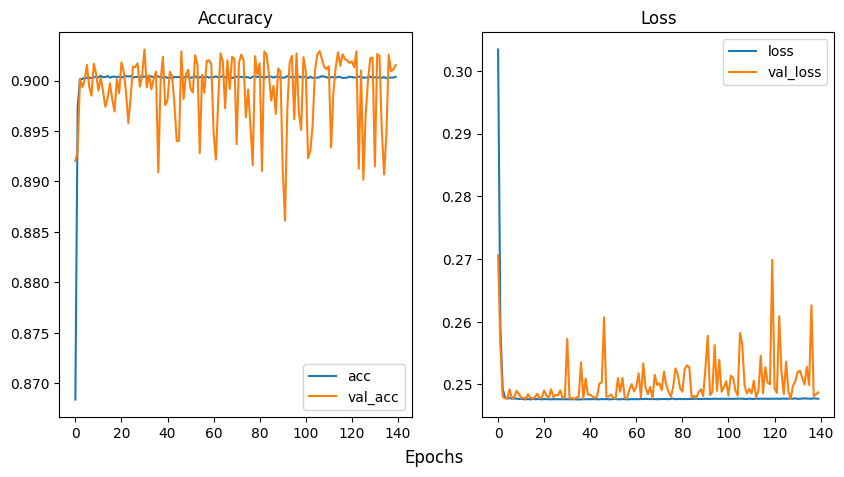

In [112]:
def generate_plot(file):
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 5))
    for key in file.keys():
        if 'acc' in key:
            axL.plot(file[key][:], label=key)

        if 'loss' in key:
            axR.plot(file[key][:], label=key)

    axL.set_title('Accuracy')
    axL.legend(loc='lower right')

    axR.set_title('Loss')
    axR.legend()
    fig.supxlabel('Epochs')
    return fig

fig = generate_plot(runtime)



### Test performance ###

In [113]:
models = []
for key in file.keys():
    if not '.keras' in key:
        continue
    models.append(file[key])

print(models)

[<HDF5 group "/model.best_acc.keras" (1 members)>, <HDF5 group "/model.best_loss.keras" (1 members)>, <HDF5 group "/model.keras" (1 members)>]


#### AUC ###

In [114]:
from sklearn.metrics import auc

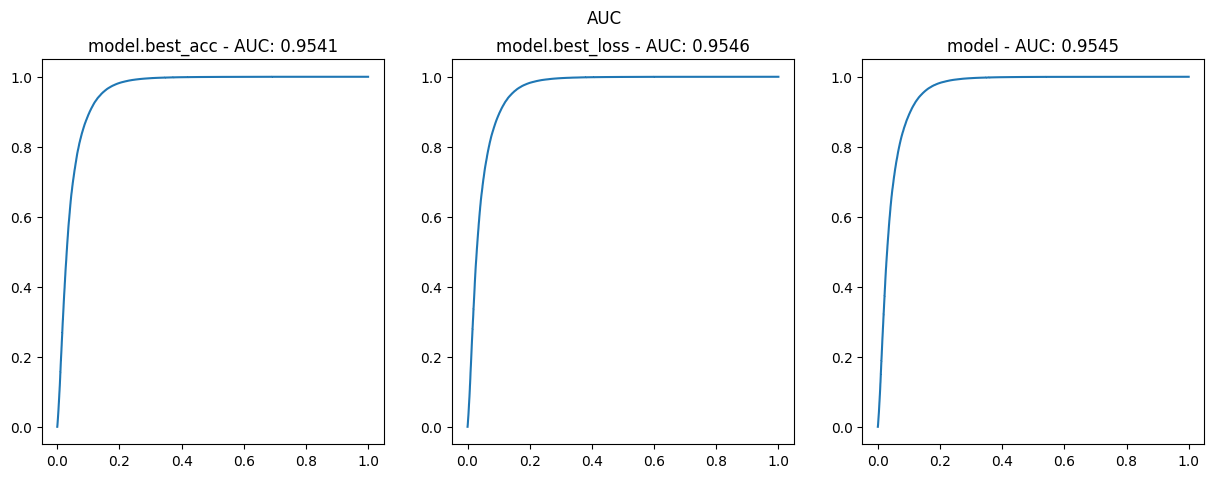

In [115]:
fig, axes = plt.subplots(ncols=len(models), figsize=(5*len(models), 5))
fig.suptitle("AUC")

for model, ax in zip(models, axes):
    data = model['auc']
    tpr, fpr = data['tpr'][:], data['fpr'][:]
    ax.plot(fpr, tpr)

    score = auc(fpr, tpr)
    score = round(score, 4)

    ax.set_title(f'{model.name[1:-6]} - AUC: {score}')

### Test metrics ###

In [116]:
import pandas as pd
test_data = pd.read_csv('nano-pelican/eval-long.csv')
test_data = test_data[test_data.num_particles==32]

FileNotFoundError: [Errno 2] No such file or directory: 'nano-pelican/eval-long.csv'

In [ ]:
for name, group in test_data.groupby('Name'):
    print(name)
    print(group.groupby('n_hidden').mean(numeric_only=True))

model.best_acc.keras
          Unnamed: 0  num_particles       acc       auc      loss
n_hidden                                                         
1                0.0           32.0  0.904441  0.954148  0.254517
2                0.0           32.0  0.910098  0.960911  0.236104
3                0.0           32.0  0.916525  0.968315  0.218639
model.best_loss.keras
          Unnamed: 0  num_particles       acc       auc      loss
n_hidden                                                         
1                1.0           32.0  0.900746  0.954544  0.245594
2                1.0           32.0  0.907339  0.961049  0.230909
3                1.0           32.0  0.913337  0.968285  0.213813
model.keras
          Unnamed: 0  num_particles       acc       auc      loss
n_hidden                                                         
1                2.0           32.0  0.899626  0.954494  0.247212
2                2.0           32.0  0.908511  0.960791  0.240819
3                2.0 